In [ ]:
import tensorflow as tf

In [ ]:
import os
import cv2

In [ ]:
import numpy as np
import PIL
from PIL import Image
DirPath_lr_data = '/content/drive/MyDrive/dataset_gdrive/train/low_res'
DirPath_hr_data = '/content/drive/MyDrive/dataset_gdrive/train/high_res'
img_names = os.listdir(DirPath_lr_data)
train__lr = []
train__hr= []

for each_img in img_names:
  if each_img != '.DS_Store':
    img_path = os.path.join(DirPath_lr_data,each_img)
    img = PIL.Image.open(img_path)
    img_arr = np.array(img)
    train__lr.append(img_arr)

for each_img in img_names:
  if each_img != '.DS_Store':
    img_path = os.path.join(DirPath_hr_data,each_img)
    img = PIL.Image.open(img_path)
    img_arr = np.array(img)
    train__hr.append(img_arr)

In [ ]:
print(len(train__lr) , len(train__hr))

252 252


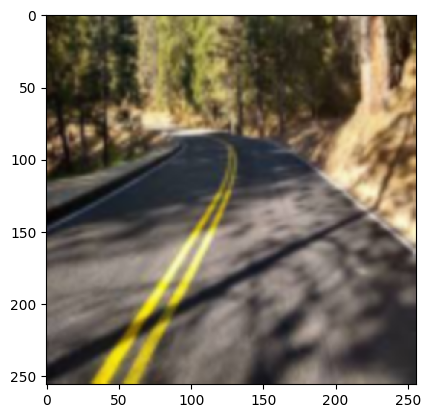

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train__lr[0])
plt.show()

In [ ]:
train__lr[0].shape

(256, 256, 4)

In [ ]:
train__lr = np.array(train__lr)
train__lr = train__lr/255.
train__lr[0]

array([[[0.16862745, 0.14117647, 0.06666667, 1.        ],
        [0.16862745, 0.14117647, 0.06666667, 1.        ],
        [0.18431373, 0.15686275, 0.08235294, 1.        ],
        ...,
        [0.18431373, 0.13333333, 0.04313725, 1.        ],
        [0.18039216, 0.12941176, 0.03921569, 1.        ],
        [0.18039216, 0.12941176, 0.03921569, 1.        ]],

       [[0.16862745, 0.14117647, 0.06666667, 1.        ],
        [0.16862745, 0.14117647, 0.06666667, 1.        ],
        [0.18431373, 0.15686275, 0.08235294, 1.        ],
        ...,
        [0.18431373, 0.13333333, 0.04313725, 1.        ],
        [0.18039216, 0.12941176, 0.03921569, 1.        ],
        [0.18039216, 0.12941176, 0.03921569, 1.        ]],

       [[0.16862745, 0.14117647, 0.07058824, 1.        ],
        [0.16862745, 0.14117647, 0.07058824, 1.        ],
        [0.19607843, 0.16862745, 0.09803922, 1.        ],
        ...,
        [0.18431373, 0.12941176, 0.03921569, 1.        ],
        [0.17647059, 0.125490

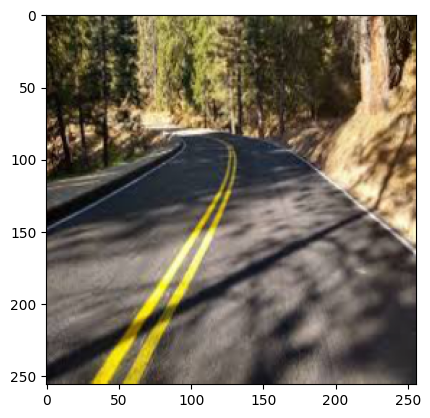

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train__hr[0])
plt.show()

In [ ]:
train__hr = np.array(train__hr)
train__hr = train__hr/255.
train__hr[0]

array([[[0.17647059, 0.14901961, 0.08235294, 1.        ],
        [0.17647059, 0.14901961, 0.0745098 , 1.        ],
        [0.17647059, 0.14901961, 0.0745098 , 1.        ],
        ...,
        [0.23137255, 0.18431373, 0.09019608, 1.        ],
        [0.19215686, 0.14509804, 0.05098039, 1.        ],
        [0.18823529, 0.14117647, 0.04705882, 1.        ]],

       [[0.12941176, 0.10196078, 0.03137255, 1.        ],
        [0.16078431, 0.13333333, 0.05882353, 1.        ],
        [0.20392157, 0.17647059, 0.10196078, 1.        ],
        ...,
        [0.19607843, 0.14901961, 0.05490196, 1.        ],
        [0.17254902, 0.1254902 , 0.03137255, 1.        ],
        [0.16862745, 0.12156863, 0.02745098, 1.        ]],

       [[0.12941176, 0.10196078, 0.03529412, 1.        ],
        [0.15294118, 0.1254902 , 0.05490196, 1.        ],
        [0.21176471, 0.18431373, 0.11372549, 1.        ],
        ...,
        [0.16862745, 0.12156863, 0.02352941, 1.        ],
        [0.16078431, 0.113725

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout,UpSampling2D,Add
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from keras.models import Model

In [ ]:
def Super_Resolution():
    input_img = Input(shape=train__lr.shape[1:])

    l1 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(input_img)
    l1 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l1)
    m1 = MaxPooling2D(pool_size=2)(l1)

    l2 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(m1)
    l2 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l2)
    m2 = MaxPooling2D(pool_size=2)(l2)

    l3 = Conv2D(256,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(m2)

    u1 = UpSampling2D(size=2)(l3)
    l4 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(u1)
    l4 = Conv2D(128,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l4)
    add1 = Add()([l4,l2])

    u2 = UpSampling2D(size=2)(add1)
    l5 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(u2)
    l5 = Conv2D(64,kernel_size=4,activation="relu",padding="same",activity_regularizer=regularizers.l1(10e-10))(l5)
    add2 = Add()([l5,l1])

    output = Conv2D(4,kernel_size=4,activation="linear",padding="same",activity_regularizer=regularizers.l1(10e-10))(add2)

    model = Model(input_img,output)
    return model

model2 = Super_Resolution()
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  4160        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  65600       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model2.compile(loss="mean_squared_error",optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history = model2.fit(train__lr,train__hr,validation_split=0.2,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 69s 5s/step - loss: 0.1399 - accuracy: 0.7957 - val_loss: 0.0253 - val_accuracy: 0.9572
Epoch 2/100
7/7 [==============================] - 13s 2s/step - loss: 0.0176 - accuracy: 0.9521 - val_loss: 0.0116 - val_accuracy: 0.8935
Epoch 3/100
7/7 [==============================] - 13s 2s/step - loss: 0.0097 - accuracy: 0.9365 - val_loss: 0.0072 - val_accuracy: 0.9788
Epoch 4/100
7/7 [==============================] - 13s 2s/step - loss: 0.0068 - accuracy: 0.9485 - val_loss: 0.0061 - val_accuracy: 0.9556
Epoch 5/100
7/7 [==============================] - 13s 2s/step - loss: 0.0059 - accuracy: 0.9589 - val_loss: 0.0052 - val_accuracy: 0.9242
Epoch 6/100
7/7 [==============================] - 13s 2s/step - loss: 0.0053 - accuracy: 0.9453 - val_loss: 0.0044 - val_accuracy: 0.9534
Epoch 7/100
7/7 [==============================] - 12s 2s/step - loss: 0.0045 - accuracy: 0.9405 - val_loss: 0.0038 - val_accuracy: 0.9661
Epoch 8/100
7/7 [==========

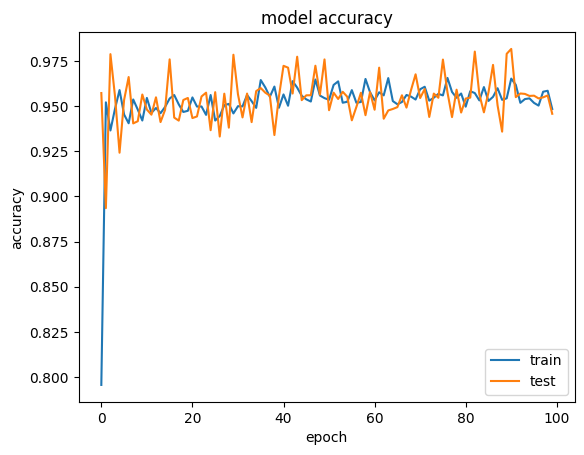

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

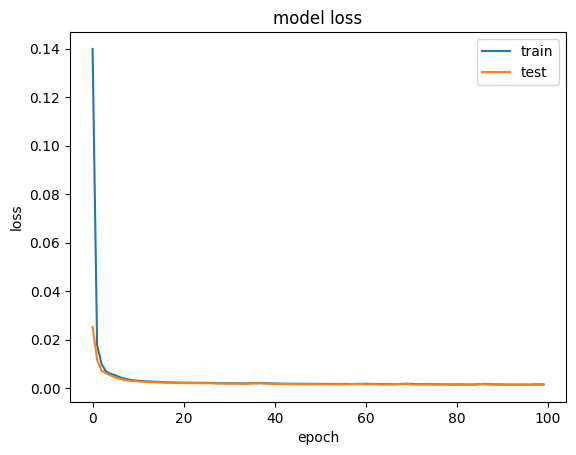

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/dataset_gdrive/test/442.png')
img_arr = np.array(img)

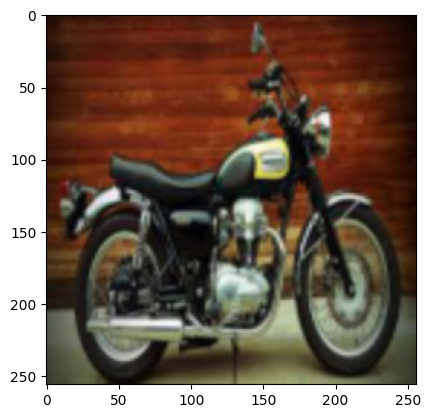

In [ ]:
input_to_model = np.array([img_arr])
plt.imshow(input_to_model[0])
plt.show()

In [ ]:
test_img = img_arr/255.
input_to_model = np.array([test_img])
input_to_model.shape

(1, 256, 256, 4)

In [ ]:
hr_output = model2.predict(input_to_model)

1/1 [==============================] - 1s 820ms/step


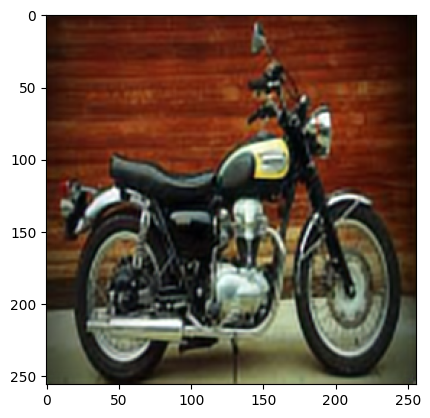

In [ ]:
arr = np.squeeze(hr_output) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(arr)
plt.show()

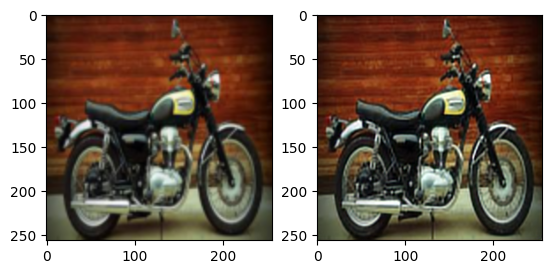

In [ ]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(input_to_model[0])
f.add_subplot(1,2, 2)
plt.imshow(arr)
plt.show()

In [ ]:
img_orginal = PIL.Image.open('/content/drive/MyDrive/dataset_gdrive/test/442_high.png')
img_orginal_arr = np.array(img_orginal)

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
v1 = PSNR(img_orginal_arr/255.,img_arr/255.)
v1

27.258380115150263

In [ ]:
v2 = PSNR(img_orginal_arr/255.,arr)
v2

29.793497467621933

In [ ]:
img_orginal_arr.shape

(256, 256, 4)

In [ ]:
img1 = img_orginal_arr/255.

In [ ]:
img2 = img_arr/255.

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity

ssim_score = structural_similarity(img1, img2, win_size=5 ,data_range=1, multichannel=True, channel_axis=2)
print(ssim_score)

0.8820911374647885


<ipython-input-29-439158ffd61d>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = structural_similarity(img1, img2, win_size=5 ,data_range=1, multichannel=True, channel_axis=2)


In [ ]:
img3 = arr

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity

ssim_score = structural_similarity(img1, img3, win_size=5 ,data_range=1, multichannel=True, channel_axis=2)
print(ssim_score)

0.9198294412712236


<ipython-input-31-e30ad34f311e>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = structural_similarity(img1, img3, win_size=5 ,data_range=1, multichannel=True, channel_axis=2)


In [ ]:
model2.save('model3.h5')